# Lending Club Case Study

## 1. Data Understanding

1. Problem Statement
2. Objectives
3. Understanding the dataset
4. Dataset Attributes
5. Dataset Row Analysis
6. Dataset Column Analysis
7. Handling missing data
8. Handling Outliers

# Import necessary libraries

In [318]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import HTML
warnings.filterwarnings('ignore')

In [319]:
pd.set_option('display.max_rows', None)     # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_colwidth', None) # Set the maximum column width
#pd.set_option('display.width', None)

##### Load Data Data Dictionary

In [320]:
#Value must be one of {'justify', 'right', 'fill', 'center', 'general', 'left', 'centerContinuous', 'distributed'}
data_dict.style.set_properties(**{'text-align': 'justify'}).to_excel('Data_Dictionary.xlsx', engine='openpyxl')
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


#  Load the dataset

In [321]:
df= pd.read_csv('loan.csv')

# Read Sample data

In [322]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [324]:
df.shape

(39717, 111)

In [325]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [326]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


# Check the data types of each column

In [327]:
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [328]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

In [214]:
duplicate_rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [329]:
df.shape

(39717, 111)

In [330]:
# Check  missing value percentage
percentage_missing = (df.isnull().sum() / len(df)) * 100
percentage_missing_sorted = percentage_missing.sort_values(ascending=False)
percentage_missing_sorted

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [331]:
columns_above_50_percent_missing = percentage_missing_sorted[percentage_missing_sorted > 50]
columns_above_50_percent_missing


verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

In [332]:
len(columns_above_50_percent_missing)

57

In [333]:
# Drop columns with missing values above 50%
df.drop(columns=columns_above_50_percent_missing.index, inplace=True)

In [334]:
df.shape

(39717, 54)

In [335]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


# Identifiers
1. id (Unique loan ID)
2. member_id (Unique borrower ID)
3. url (URL for the LC page with listing data)

Above fields can be ignored for the purpose of this analysis

In [336]:
columns_to_drop=['id','member_id','url']
df.drop(columns=columns_to_drop, axis=1, inplace=True)


# Descriptors
1. title (Loan title provided by the borrower)
2. desc (Loan description provided by the borrower)
3. emp_title (Borrower's employment title)
4. addr_state (Borrower's state)
5. zip_code 

In [337]:
# Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
df.drop(['title','desc','emp_title','addr_state','zip_code'],axis=1,inplace=True)

In [339]:
def find_constant_columns(df):
    """
    Identifies columns in the DataFrame that have constant values.

    Parameters:
    df (pd.DataFrame): The DataFrame to check for constant columns.

    Returns:
    list: A list of column names that have constant values.
    """
    constant_columns = []
    for col in df.columns:
        if len(df[col].value_counts()) == 1:
            constant_columns.append(col)
    return constant_columns

In [340]:
constant_columns=find_constant_columns(df)
constant_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [341]:
# Check for constant columns
for col in df.columns:
    value_counts = df[col].value_counts()
    if len(value_counts) == 1:
        print(f"Column '{col}' has constant value: {value_counts.index[0]}")

Column 'pymnt_plan' has constant value: n
Column 'initial_list_status' has constant value: f
Column 'collections_12_mths_ex_med' has constant value: 0.0
Column 'policy_code' has constant value: 1
Column 'application_type' has constant value: INDIVIDUAL
Column 'acc_now_delinq' has constant value: 0
Column 'chargeoff_within_12_mths' has constant value: 0.0
Column 'delinq_amnt' has constant value: 0
Column 'tax_liens' has constant value: 0.0


In [342]:
df.drop(columns=constant_columns, axis=1, inplace=True)

In [343]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

### List the columns which are Object type and analyize if any type conversion required

In [344]:
columns_with_missing_values = df.columns[df.isnull().any()]
columns_with_missing_values

Index(['emp_length', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [345]:
# Step 2: Check the data types for the columns with missing values
df_missing_values = df[columns_with_missing_values]
df_missing_values.dtypes

emp_length               object
revol_util               object
last_pymnt_d             object
last_credit_pull_d       object
pub_rec_bankruptcies    float64
dtype: object

In [346]:
df_missing_values.head()

,emp_length,revol_util,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,10+ years,83.70%,Jan-15,May-16,0.0
1,< 1 year,9.40%,Apr-13,Sep-13,0.0
2,10+ years,98.50%,Jun-14,May-16,0.0
3,10+ years,21%,Jan-15,Apr-16,0.0
4,1 year,53.90%,May-16,May-16,0.0


# Look at missing value column in the Data dictnary to understand those column 

In [347]:
data_dict_desc =  data_dict[data_dict['LoanStatNew'].isin(df_missing_values)]

In [348]:
data_dict_desc

,LoanStatNew,Description
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
36,last_credit_pull_d,The most recent month LC pulled credit for this loan
40,last_pymnt_d,Last month payment was received
86,pub_rec_bankruptcies,Number of public record bankruptcies
91,revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."


In [349]:
unique_values = df['emp_length'].unique()

In [299]:
unique_values

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [350]:
df['emp_length'].fillna('0', inplace=True)
unique_values = df['emp_length'].unique()
unique_values

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', '0'],
      dtype=object)

Dropping records where loan_status = 'Current'  because:
Lack of outcome: loans in progress don't have a clear outcome (default or no default), which is the target variable we're trying to predict.
Incomplete information: Current loans may not have complete information, as they're still ongoing, which could lead to biased or inaccurate predictions.
Focus on completed loans: By dropping current loans, we can focus on completed loans with a clear outcome.

In [351]:
df=df[df['loan_status'].str.lower() != "current"]

In [352]:
pub_rec_bankruptcies_null_percentage = (df['pub_rec_bankruptcies'].isnull().sum() / len(df)) * 100
pub_rec_bankruptcies_null_percentage

1.8067760582730643

# Small percentage of missing values (1.80). In this case, dropping the rows with missing values 
# as it won't significantly impact the overall analysis.

In [353]:
df.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [354]:
df.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 50
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt

In [355]:
df['revol_util'].isnull().sum()

50

In [356]:
df['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [358]:
# Very small chunk of data contains NAN value show removing the rows where revol_util=NAN
df.dropna(subset=['revol_util'], inplace=True)

In [359]:
df.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt

In [360]:
df['last_pymnt_d'].unique()
null_percentage = (df['last_pymnt_d'].isnull().sum() / len(df)) * 100
print(null_percentage)

0.17710811525244516


In [361]:
# Very small chunk of data contains NAN value show removing the rows where last_pymnt_d=NAN
df.dropna(subset=['last_pymnt_d'], inplace=True)

In [362]:
df.shape

(37763, 37)

In [363]:
df['last_credit_pull_d'].unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

In [364]:
df.dropna(subset=['last_credit_pull_d'], inplace=True)
#df_cleaned['last_credit_pull_d'].fillna(df_cleaned['last_credit_pull_d'].mode()[0], inplace=True)

In [365]:
df.shape

(37762, 37)

In [366]:
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amn

In [367]:
df.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp     

# Converting Column Format

In [368]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d']

In [252]:
df[object_columns].head(10)

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,Jan-85,83.70%,Jan-15,May-16
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,Apr-99,9.40%,Apr-13,Sep-13
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,Nov-01,98.50%,Jun-14,May-16
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,Feb-96,21%,Jan-15,Apr-16
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other,Jan-96,53.90%,May-16,May-16
5,36 months,7.90%,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,Nov-04,28.30%,Jan-15,Jan-16
6,60 months,15.96%,C,C5,8 years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,Jul-05,85.60%,May-16,May-16
7,36 months,18.64%,E,E1,9 years,RENT,Source Verified,Dec-11,Fully Paid,car,Jan-07,87.50%,Jan-15,Dec-14
8,60 months,21.28%,F,F2,4 years,OWN,Source Verified,Dec-11,Charged Off,small_business,Apr-04,32.60%,Apr-12,Aug-12
9,60 months,12.69%,B,B5,< 1 year,RENT,Verified,Dec-11,Charged Off,other,Sep-04,36.50%,Nov-12,Mar-13


In [369]:
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)

In [370]:
df['term'] = df['term'].str.replace(' months', '').astype(int)

In [371]:
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)

In [372]:
df['issue_d'] =  pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

In [373]:
df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0
7,3000,3000,3000.0,36,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,5.55,0,2004-04-01,2,11,0,5210,32.6,13,0.0,0.0,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,2012-04-01,152.39,2012-08-01,0.0
9,5375,5375,5350.0,60,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,2011-12-01,Charged Off,other,18.08,0,2004-09-01,0,2,0,9279,36.5,3,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,2012-11-01,121.45,2013-03-01,0.0
10,6500,6500,6500.0,60,14.65,153.45,C,C3,5 years,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,16.12,0,1998-01-01,2,14,0,4032,20.6,23,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.00,2013-06-01,1655.54,2015-12-01,0.0


# Standardizing Values

In [374]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [ ]:
# verification_status 

In [375]:
df['loan_verified'] = np.where(df['verification_status'].isin(['Verified', 'Source Verified']), 1, 0)

In [376]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

### emp_length convert to numeric value

In [377]:
def clean_emp_length(emp_str):
    if emp_str == '< 1 year' or emp_str == '0':
        return 0
    elif '+' in emp_str:
        value = float(re.findall(r'\d+', emp_str)[0])
        return value + 0.5
    else:
        return float(re.findall(r'\d+', emp_str)[0])

#df['emp_length_yr'] = df['emp_length'].apply(clean_emp_length).astype(float)

In [378]:
df['emp_length']=df['emp_length'].apply(clean_emp_length).astype(float)

In [379]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_verified
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.5,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.5,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.5,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,1
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,1


In [380]:
df.dtypes

loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                        float64
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                            int64
pub_rec                             int64
revol_bal                           int64
revol_util                        float64
total_acc                         

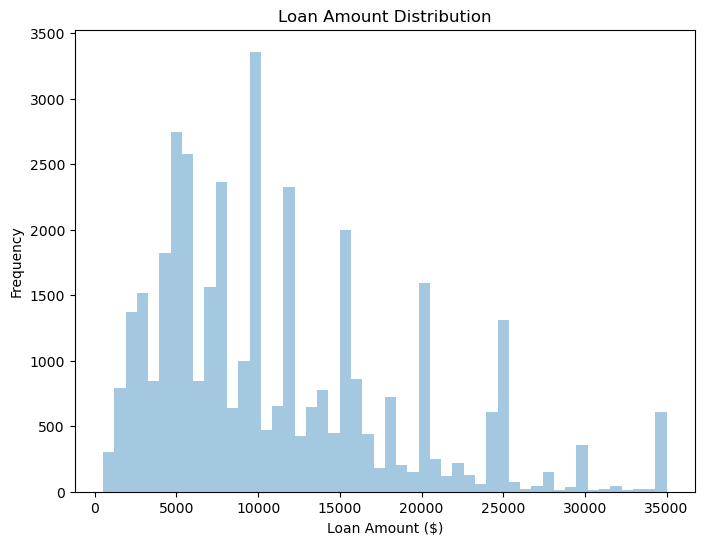

In [382]:
# Univariate analysis
# loan_amnt
plt.figure(figsize=(8,6))
sns.distplot(df['loan_amnt'], kde=False)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()

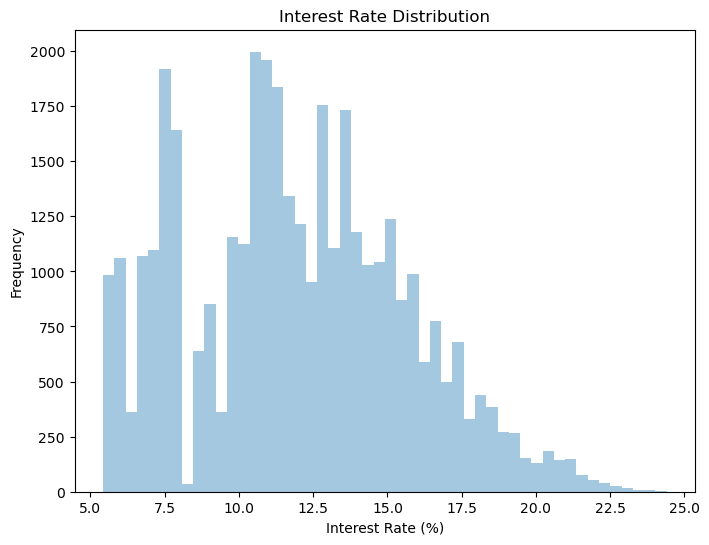

In [384]:
# int_rate
plt.figure(figsize=(8,6))
sns.distplot(df['int_rate'], kde=False)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()


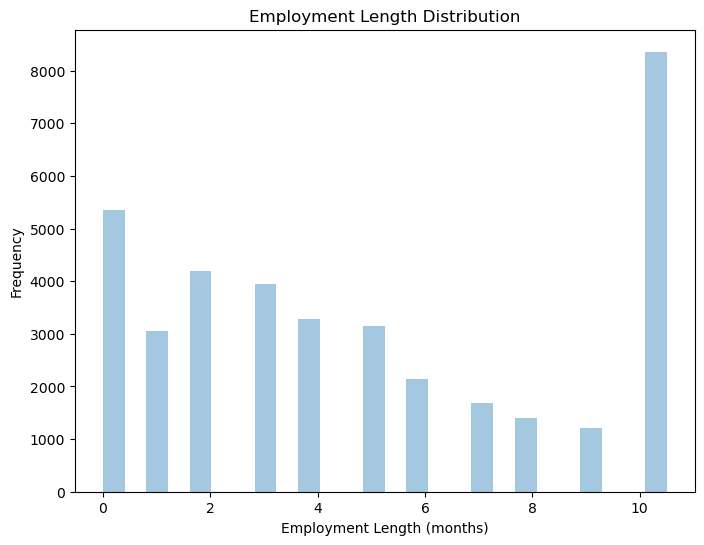

In [386]:
# emp_length
plt.figure(figsize=(8,6))
sns.distplot(df['emp_length'], kde=False)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length (months)')
plt.ylabel('Frequency')
plt.show()

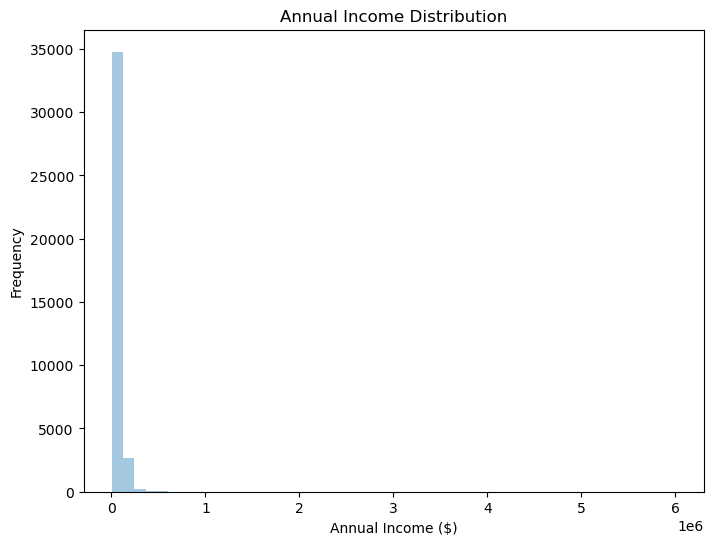

In [387]:
# annual_inc Need some features engineering here
plt.figure(figsize=(8,6))
sns.distplot(df['annual_inc'], kde=False)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.show()

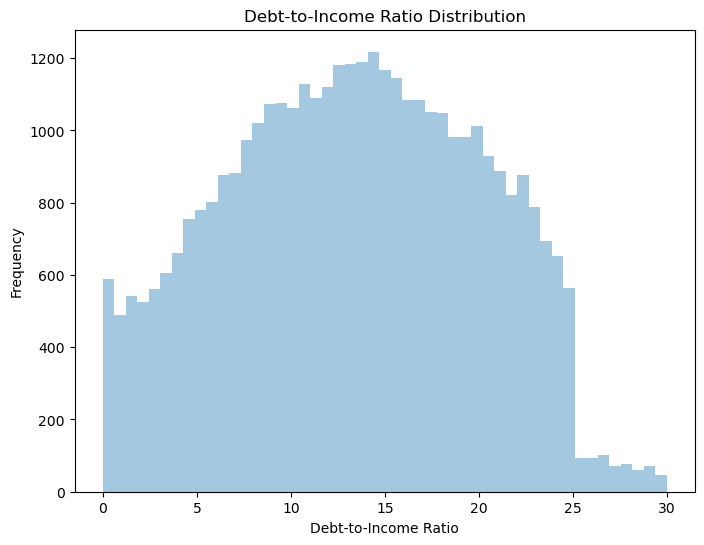

In [388]:

# dti
plt.figure(figsize=(8,6))
sns.distplot(df['dti'], kde=False)
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()


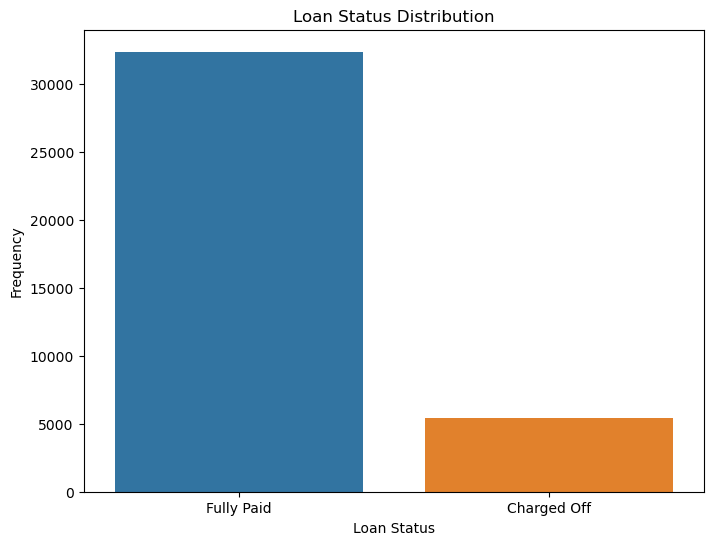

In [389]:
# loan_status
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

### 3.2 Univariate Analysis

Following fields will be checked as part of univariate analysis

#### 1. Categorical variables
    1. Ordered categorical data
        1. Grade (grade)
        2. Sub grade (sub_grade)
        3. Term (36 / 60 months) (term)
        4. Employment length (emp_length)
        5. Issue year (issue_y)
        6. Issue month (issue_m)
        7. Issue quarter (issue_q)

    2. Unordered categorical data
        1. Address State (addr_state)
        2. Loan purpose (purpose)
        3. Home Ownership (home_ownership)
        4. Loan status (loan_status)
        5. Loan paid (loan_paid)
    
#### 2. Quantitative variables
    1. Interest rate bucket (int_rate_bucket)
    2. Annual income bucket (annual_inc_bucket)
    3. Loan amount bucket (loan_amnt_bucket)
    4. Funded amount bucket (funded_amnt_bucket)
    5. Debt to Income Ratio (DTI) bucket (dti_bucket)
    6. Monthly Installment (installment)

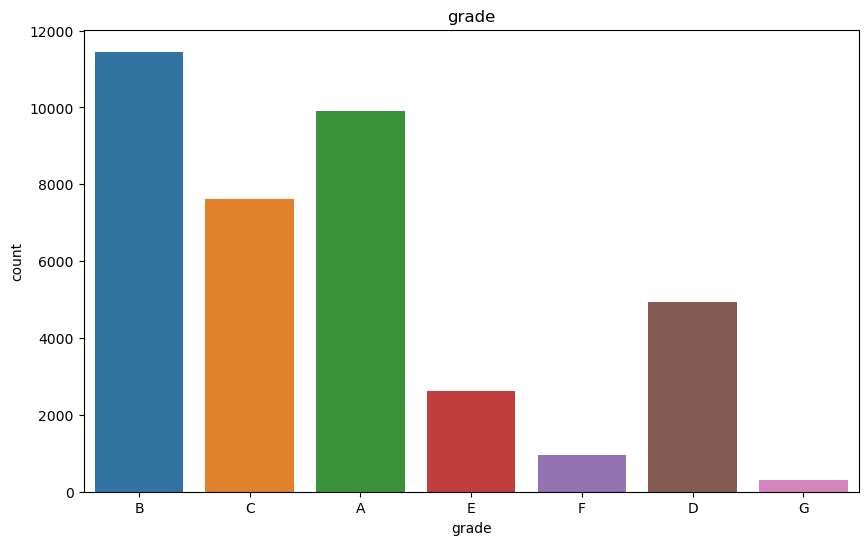

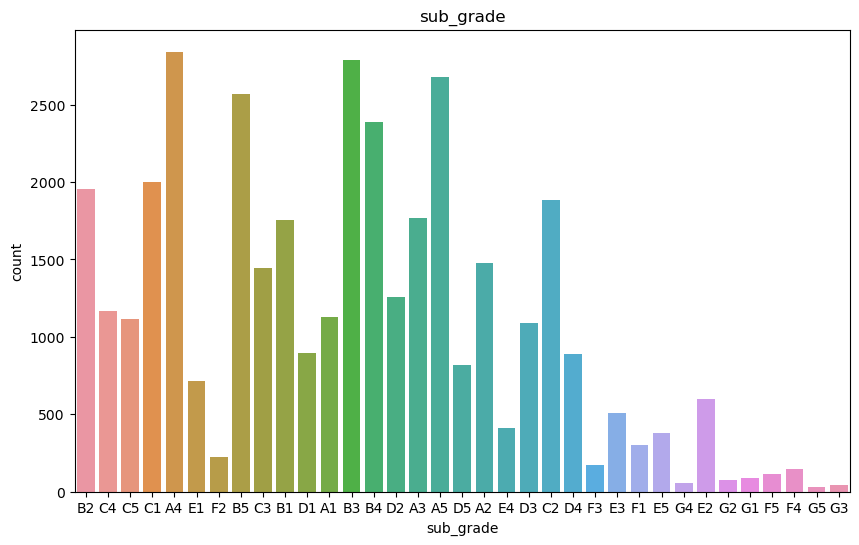

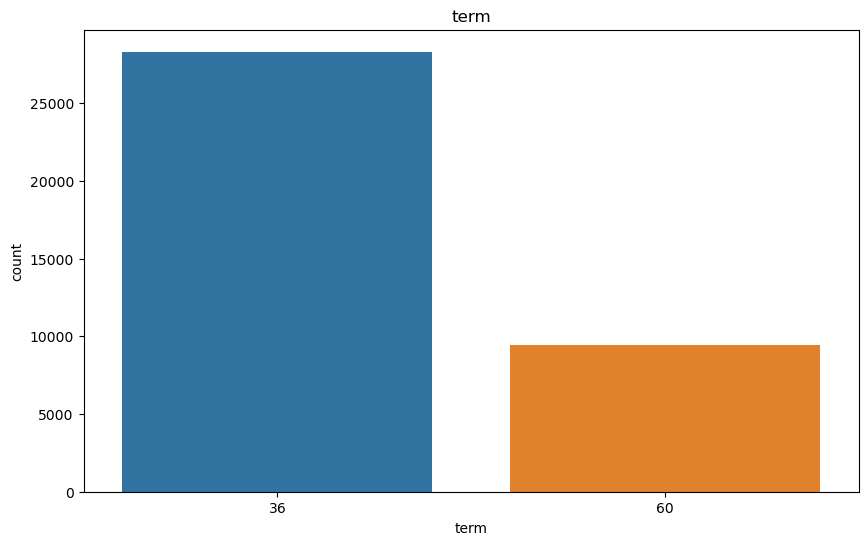

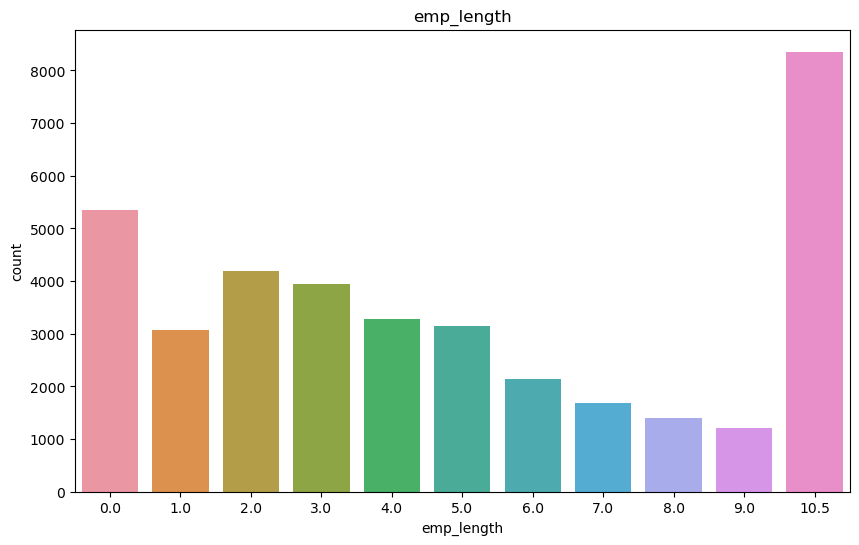

In [394]:
for o_cat_var in ['grade', 'sub_grade', 'term', 'emp_length']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=o_cat_var)
    plt.title(o_cat_var)
    plt.show()

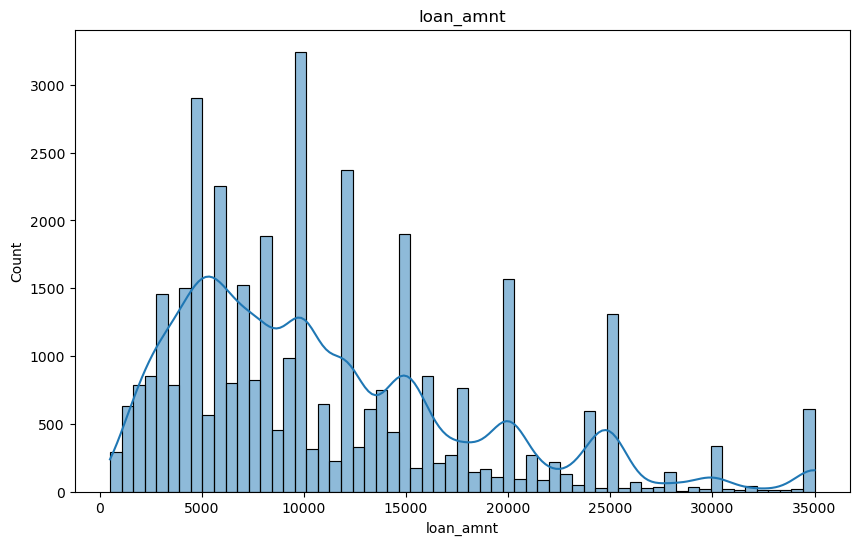

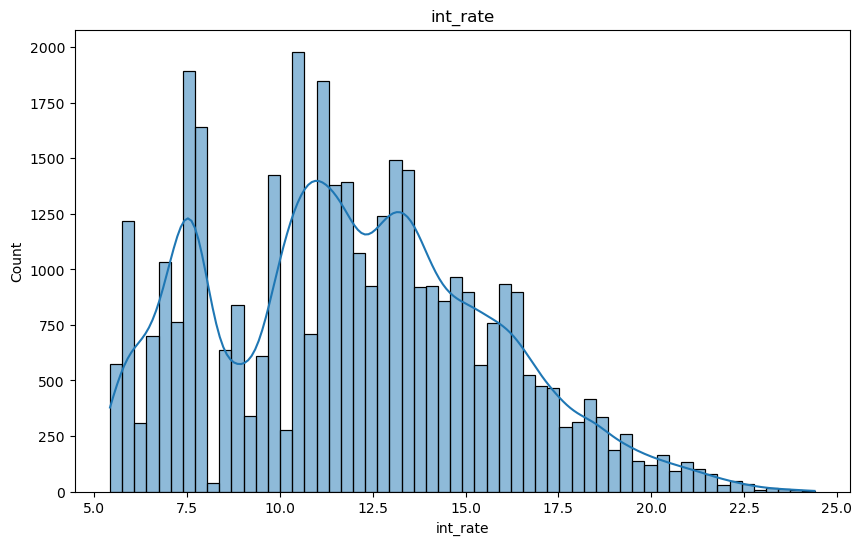

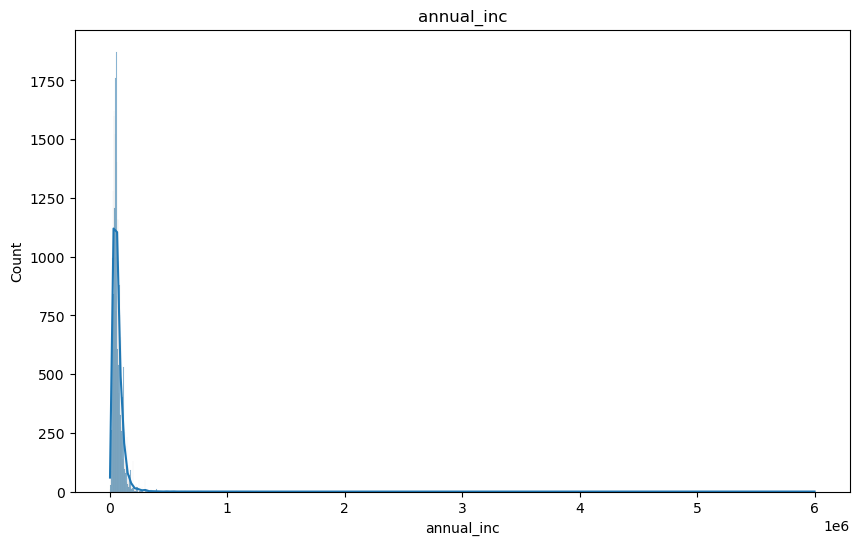

In [395]:
for num_var in ['loan_amnt', 'int_rate', 'annual_inc']:
    # Plot a histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=num_var, kde=True)
    plt.title(num_var)
    plt.show()